In [1]:
# Import packages
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
class TfLinReg(object):
    """
    Implementing linear regression using computational graph with tensorflow.
    It's based on Batch Gradient Descent
    """
    def __init__(self, learning_rate=0.001, x_dim=None, seed=None):
        """
        Initialize instance of class TfLinReg.

        Arguments:
        learning_rate -- step size gradient descent makes on each iteration
                         --> scalar.
        x_dim -- number of features of the input data --> scalar.
        seed -- used to get consistent output.
        """
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()

        # Initialize the graph
        with self.g.as_default():
            # Setup the seed to get consistent results
            tf.set_random_seed(seed)
            # Build the graph
            self.build()
            # Initialize the global variables
            self.init = tf.global_variables_initializer()

    def build(self):
        """
        Build computational graph.
        """

        self.X = tf.placeholder(dtype=tf.float32,
                                shape=(None, self.x_dim),
                                name="X")
        self.Y = tf.placeholder(dtype=tf.float32,
                                shape=None,
                                name="Y")
        print(self.X)
        print(self.Y)
        self.weights = tf.Variable(initial_value=tf.zeros((self.x_dim, 1)),
                                   dtype=tf.float32,
                                   name="weights")
        self.bias = tf.Variable(initial_value=tf.zeros((1, 1)),
                                dtype=tf.float32,
                                name="bias")
        print(self.weights)
        print(self.bias)
        self.z = tf.squeeze(tf.add(tf.multiply(self.X, self.weights),
                            self.bias), name="output")
        print(self.z)
        square_error = tf.square(self.z - self.Y, name="square_error")
        self.mean_cost = tf.reduce_mean(square_error, name="mean_cost")
        print(square_error)
        print(self.mean_cost)
        self.optimizer = tf.train.GradientDescentOptimizer(
            self.learning_rate).minimize(self.mean_cost)

    def train_linreg(self, X_train, Y_train, num_epochs=100):
        """
        Train the learning algorithm to get the optimal weights and bias.

        Arguments:
        X_train -- input data, shape: number of examples x number of features.
        Y_train -- label vector, shape: number of examples.
        num_epochs -- number of iteration the learning algorithm goes through
                      --> scalar.

        Returns:
        costs -- training mean squared error for every iteration --> list
        """
        self.sess = tf.Session(graph=self.g)
        self.sess.run(self.init)
        costs = []

        for epoch in range(num_epochs):
            _, cost = self.sess.run([self.optimizer, self.mean_cost],
                                    feed_dict={self.X: X_train,
                                               self.Y: Y_train})

            costs.append(cost)

        return costs

    def get_weights(self):
        """
        Get the optimal weight after training.
        """
        w = self.sess.run(self.weights)

        return w

    def get_bias(self):
        """
        Get the optimal bias after training.
        """
        b = self.sess.run(self.bias)

        return b

    def predict_linreg(self, X_test):
        """
        Performs prediction on inputs provided using optimal weights and bias.

        Arguments:
        X_test -- test examples.

        Returns:
        pred -- predictions using test examples.
        """
        pred = self.sess.run(self.z, feed_dict={self.X: X_test})

        return pred

In [3]:
X_train = np.arange(10)[:, np.newaxis]
Y_train = np.array([1, 1.3, 3.1, 2, 5, 6.3, 6.6, 7.4, 8, 9])
X_train.shape, Y_train.shape

((10, 1), (10,))

In [4]:
model = TfLinReg(learning_rate=0.01, x_dim=X_train.shape[1])

Tensor("X:0", shape=(?, 1), dtype=float32)
Tensor("Y:0", dtype=float32)
<tf.Variable 'weights:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1, 1) dtype=float32_ref>
Tensor("output:0", dtype=float32)
Tensor("square_error:0", dtype=float32)
Tensor("mean_cost:0", dtype=float32)


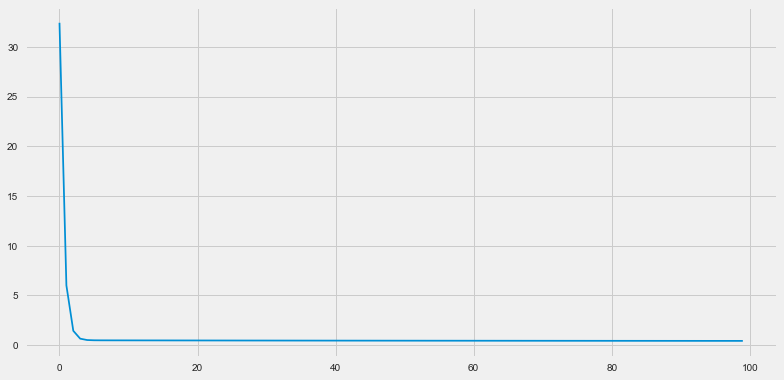

In [5]:
cost = model.train_linreg(X_train, Y_train, num_epochs=100)
plt.plot(cost);

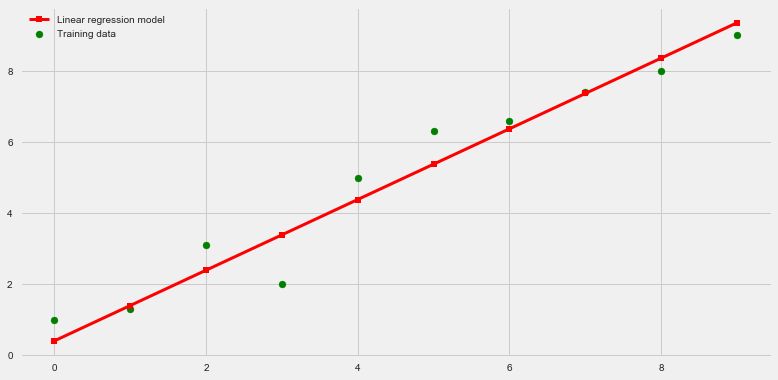

In [6]:
# Plot training data and best fit line
pred = model.predict_linreg(X_train)
plt.scatter(X_train, Y_train, label="Training data", color="g")
plt.plot(X_train, pred, color="red", marker="s", markersize=6, linewidth=3, label="Linear regression model")
plt.legend(loc="upper left");